## #01. 패키지 참조
---

In [2]:
import sys
import pandas as pd
import numpy as np
from pandas import read_excel, DataFrame, pivot_table, melt, crosstab
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer

## #02. 그래프 초기화
---

In [3]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams['axes.unicode_minus'] = False

## #03. 데이터 불러오기
---

In [4]:
origin = read_excel('#3.musinsadata_login_ratio.xlsx')
origin

,Unnamed: 0,상품번호,종류,분류,성별,가격,조회수(18세이하),조회수(19~23세),조회수(24~28세),조회수(29~33세),...,조회수,구매수(18세이하),구매수(19~23세),구매수(24~28세),구매수(29~33세),구매수(34~39세),구매수(40세이상),남성 구매수,여성 구매수,구매수
0,0,2037173,14.0,62.0,1.0,62.91,0.184494,0.269298,0.188390,0.119300,...,281836,0.127981,0.273993,0.207627,0.117263,0.079408,0.194005,0.667375,0.332625,75761
1,1,1163169,9.0,108.0,0.0,139.00,0.098197,0.218562,0.237389,0.153237,...,134648,0.014608,0.126849,0.258381,0.245146,0.161184,0.194394,0.332730,0.667270,16019
2,2,1178135,9.0,108.0,0.0,139.00,0.058832,0.236185,0.270422,0.163829,...,132138,0.006985,0.127461,0.291511,0.246740,0.147685,0.179816,0.267429,0.732571,15032
3,3,452483,14.0,31.0,0.0,169.00,0.156108,0.366356,0.210706,0.110642,...,124600,0.043304,0.363794,0.274365,0.155307,0.063924,0.099414,0.792381,0.207619,9214
4,4,2782764,14.0,4.0,1.0,263.20,0.026988,0.234663,0.339935,0.232592,...,93709,0.004380,0.185232,0.385690,0.288068,0.081560,0.055277,0.878807,0.121193,4794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7678,7678,2697817,6.0,26.0,0.0,69.90,0.022466,0.093699,0.132603,0.150685,...,1825,0.003650,0.113139,0.135036,0.204380,0.218978,0.324818,0.375912,0.624088,274
7679,7679,2757362,6.0,122.0,0.0,38.00,0.202914,0.221198,0.228780,0.163817,...,6727,0.126394,0.204461,0.245353,0.219331,0.074349,0.130112,0.754647,0.245353,269
7680,7680,3220337,3.0,102.0,0.0,55.00,0.175500,0.249127,0.183751,0.143447,...,3151,0.053638,0.242827,0.327235,0.202079,0.064033,0.110603,0.595842,0.404158,2405
7681,7681,3436582,3.0,93.0,1.0,66.75,0.016043,0.039725,0.145913,0.319328,...,1309,0.009615,0.009615,0.048077,0.317308,0.365385,0.250000,0.951923,0.048077,104


## 이상치 예외처리를 하는 근거

1. **모델의 안정성 향상**: 이상치가 모델의 학습을 방해할 수 있습니다. 예를 들어, 회귀 모델은 이상치에 크게 영향을 받아 예측이 왜곡될 수 있습니다. 따라서 이상치를 예외로 처리함으로써 모델의 안정성이 향상됩니다.

2. **통계 분석 정확도 향상**: 이상치는 평균 및 표준 편차와 같은 통계적 측정을 왜곡시키는데, 이는 데이터의 일반적인 특성을 잘못 표현할 수 있습니다. 이를 제외하면 통계 분석 결과가 더 정확해질 수 있습니다.

3. **예측 성능 향상**: 머신러닝 모델은 일반적으로 정상적인 데이터에 적응되어 있습니다. 이상치가 예측에 영향을 미치면 모델이 불안정해질 수 있습니다. 따라서 이상치를 예외로 처리하여 예측 성능을 향상시킬 수 있습니다.

4. **데이터의 일반적인 특성 파악**: 이상치를 제외하면 데이터의 일반적인 특성을 더 잘 이해할 수 있습니다. 이는 데이터에 대한 더 나은 통찰력을 제공하고 모델 개선에 도움이 됩니다.

5. **이상치의 원인 이해**: 이상치를 식별하고 예외로 처리함으로써 데이터에 대한 이해를 높일 수 있습니다. 왜 특정 데이터가 이상치로 간주되었는지 이해하면 데이터 수집 및 전처리 과정에서의 오류나 특이한 상황을 식별할 수 있습니다.

## #04. 가격이상치정제

### [1] 가격이상치 (가격 극단치 이하)

#### (1) 이상치 확인

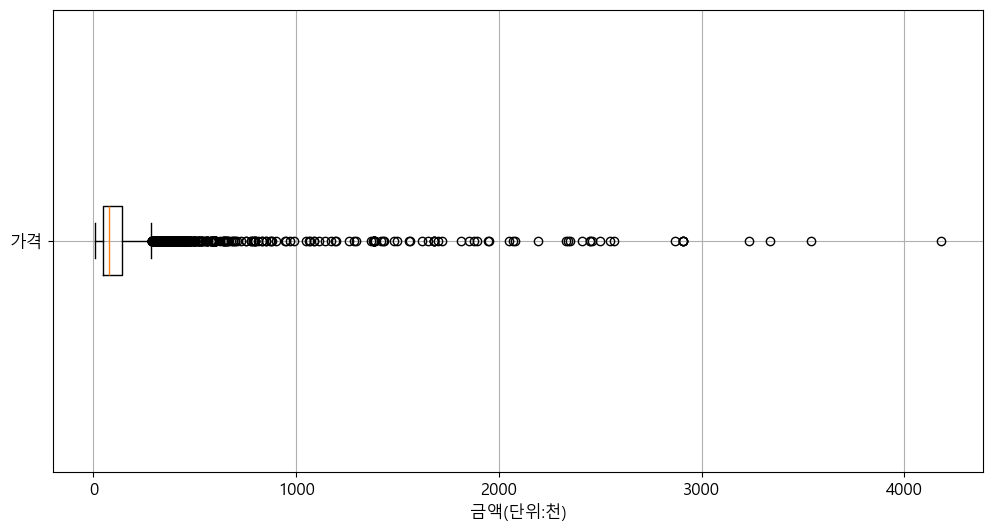

In [5]:
plt.figure()
plt.boxplot(origin['가격'],vert=0)
plt.xlabel('금액(단위:천)')
plt.yticks([1],['가격'])
plt.grid()
plt.show()
plt.close()

In [6]:
origin.sort_values(by='가격', ascending=False)

,Unnamed: 0,상품번호,종류,분류,성별,가격,조회수(18세이하),조회수(19~23세),조회수(24~28세),조회수(29~33세),...,조회수,구매수(18세이하),구매수(19~23세),구매수(24~28세),구매수(29~33세),구매수(34~39세),구매수(40세이상),남성 구매수,여성 구매수,구매수
5915,5915,3183959,17.0,60.0,2.0,4179.000,0.021225,0.096119,0.209218,0.248332,...,3298,0.010025,0.107769,0.195489,0.245614,0.225564,0.215539,0.676692,0.323308,399
7249,7249,3318594,17.0,99.0,2.0,3538.000,0.094992,0.289623,0.243160,0.151265,...,1937,0.042636,0.307171,0.320736,0.174419,0.079457,0.075581,0.917151,0.082849,2064
7647,7647,2944063,17.0,60.0,2.0,3336.000,0.066164,0.261725,0.280988,0.210637,...,2388,0.014493,0.275362,0.456522,0.195652,0.021739,0.036232,0.942029,0.057971,138
4361,4361,3220481,17.0,60.0,2.0,3233.000,0.057303,0.317959,0.242488,0.197065,...,1431,0.020992,0.234733,0.356870,0.251908,0.083969,0.051527,0.904580,0.095420,524
4197,4197,3205602,0.0,60.0,0.0,2908.000,0.068618,0.317799,0.289696,0.172365,...,4270,0.018711,0.222869,0.362994,0.261538,0.073597,0.060291,0.396258,0.603742,2405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776,3776,3711105,5.0,109.0,1.0,9.675,0.230856,0.215935,0.183840,0.131757,...,7104,0.134486,0.191162,0.249760,0.170029,0.121037,0.133525,0.826129,0.173871,1041
2289,2289,3649276,5.0,109.0,2.0,9.000,0.097856,0.236005,0.262077,0.155418,...,8860,0.057504,0.209891,0.267970,0.182864,0.128810,0.152961,0.096607,0.903393,1739
2220,2220,3545589,20.0,104.0,0.0,9.000,0.071666,0.262661,0.348342,0.199736,...,28828,0.007979,0.185173,0.375997,0.296543,0.100066,0.034574,0.320811,0.679189,3008
4258,4258,3006425,15.0,84.0,0.0,8.900,0.056278,0.282793,0.310805,0.164790,...,43516,0.023053,0.251044,0.380287,0.187874,0.065529,0.092576,0.474315,0.525685,5509


#### (2) 이상치 정제

In [7]:
outline_price = origin.copy()

Q1 = origin['가격'].quantile(0.25)
Q2 = origin['가격'].quantile(0.5)
Q3 = origin['가격'].quantile(0.75)

# Q1,Q2,Q3

iqr = Q3 - Q1 # 사분위 범위
# print(iqr)

outline_max = Q3 + iqr * 1.5 # 상한 극단치 경계
outline_price.loc[outline_price['가격'] > outline_max, '가격'] = np.nan
outline_price

,Unnamed: 0,상품번호,종류,분류,성별,가격,조회수(18세이하),조회수(19~23세),조회수(24~28세),조회수(29~33세),...,조회수,구매수(18세이하),구매수(19~23세),구매수(24~28세),구매수(29~33세),구매수(34~39세),구매수(40세이상),남성 구매수,여성 구매수,구매수
0,0,2037173,14.0,62.0,1.0,62.91,0.184494,0.269298,0.188390,0.119300,...,281836,0.127981,0.273993,0.207627,0.117263,0.079408,0.194005,0.667375,0.332625,75761
1,1,1163169,9.0,108.0,0.0,139.00,0.098197,0.218562,0.237389,0.153237,...,134648,0.014608,0.126849,0.258381,0.245146,0.161184,0.194394,0.332730,0.667270,16019
2,2,1178135,9.0,108.0,0.0,139.00,0.058832,0.236185,0.270422,0.163829,...,132138,0.006985,0.127461,0.291511,0.246740,0.147685,0.179816,0.267429,0.732571,15032
3,3,452483,14.0,31.0,0.0,169.00,0.156108,0.366356,0.210706,0.110642,...,124600,0.043304,0.363794,0.274365,0.155307,0.063924,0.099414,0.792381,0.207619,9214
4,4,2782764,14.0,4.0,1.0,263.20,0.026988,0.234663,0.339935,0.232592,...,93709,0.004380,0.185232,0.385690,0.288068,0.081560,0.055277,0.878807,0.121193,4794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7678,7678,2697817,6.0,26.0,0.0,69.90,0.022466,0.093699,0.132603,0.150685,...,1825,0.003650,0.113139,0.135036,0.204380,0.218978,0.324818,0.375912,0.624088,274
7679,7679,2757362,6.0,122.0,0.0,38.00,0.202914,0.221198,0.228780,0.163817,...,6727,0.126394,0.204461,0.245353,0.219331,0.074349,0.130112,0.754647,0.245353,269
7680,7680,3220337,3.0,102.0,0.0,55.00,0.175500,0.249127,0.183751,0.143447,...,3151,0.053638,0.242827,0.327235,0.202079,0.064033,0.110603,0.595842,0.404158,2405
7681,7681,3436582,3.0,93.0,1.0,66.75,0.016043,0.039725,0.145913,0.319328,...,1309,0.009615,0.009615,0.048077,0.317308,0.365385,0.250000,0.951923,0.048077,104


In [8]:
general_price = outline_price.dropna()
outline_price

,Unnamed: 0,상품번호,종류,분류,성별,가격,조회수(18세이하),조회수(19~23세),조회수(24~28세),조회수(29~33세),...,조회수,구매수(18세이하),구매수(19~23세),구매수(24~28세),구매수(29~33세),구매수(34~39세),구매수(40세이상),남성 구매수,여성 구매수,구매수
0,0,2037173,14.0,62.0,1.0,62.91,0.184494,0.269298,0.188390,0.119300,...,281836,0.127981,0.273993,0.207627,0.117263,0.079408,0.194005,0.667375,0.332625,75761
1,1,1163169,9.0,108.0,0.0,139.00,0.098197,0.218562,0.237389,0.153237,...,134648,0.014608,0.126849,0.258381,0.245146,0.161184,0.194394,0.332730,0.667270,16019
2,2,1178135,9.0,108.0,0.0,139.00,0.058832,0.236185,0.270422,0.163829,...,132138,0.006985,0.127461,0.291511,0.246740,0.147685,0.179816,0.267429,0.732571,15032
3,3,452483,14.0,31.0,0.0,169.00,0.156108,0.366356,0.210706,0.110642,...,124600,0.043304,0.363794,0.274365,0.155307,0.063924,0.099414,0.792381,0.207619,9214
4,4,2782764,14.0,4.0,1.0,263.20,0.026988,0.234663,0.339935,0.232592,...,93709,0.004380,0.185232,0.385690,0.288068,0.081560,0.055277,0.878807,0.121193,4794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7678,7678,2697817,6.0,26.0,0.0,69.90,0.022466,0.093699,0.132603,0.150685,...,1825,0.003650,0.113139,0.135036,0.204380,0.218978,0.324818,0.375912,0.624088,274
7679,7679,2757362,6.0,122.0,0.0,38.00,0.202914,0.221198,0.228780,0.163817,...,6727,0.126394,0.204461,0.245353,0.219331,0.074349,0.130112,0.754647,0.245353,269
7680,7680,3220337,3.0,102.0,0.0,55.00,0.175500,0.249127,0.183751,0.143447,...,3151,0.053638,0.242827,0.327235,0.202079,0.064033,0.110603,0.595842,0.404158,2405
7681,7681,3436582,3.0,93.0,1.0,66.75,0.016043,0.039725,0.145913,0.319328,...,1309,0.009615,0.009615,0.048077,0.317308,0.365385,0.250000,0.951923,0.048077,104


#### (3) 이상치 정제후

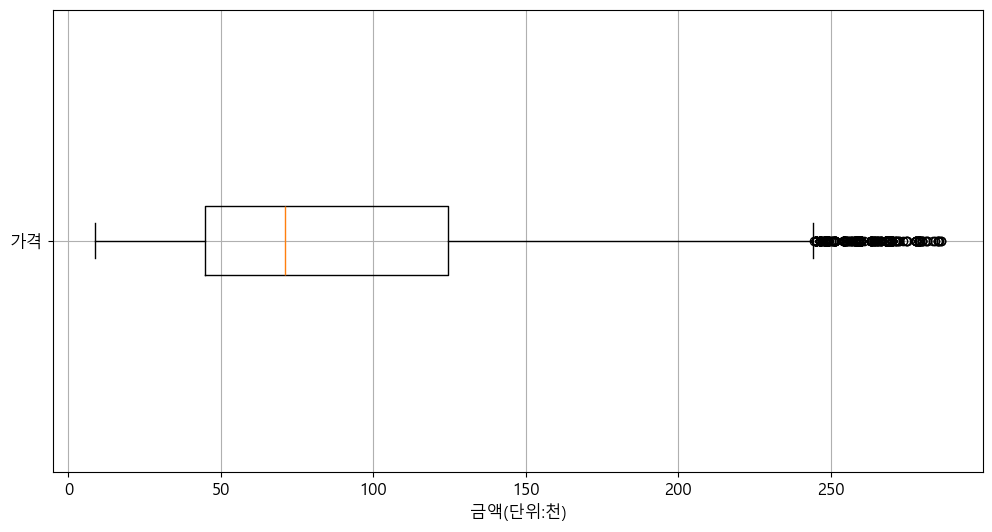

In [9]:
plt.figure()
plt.boxplot(general_price['가격'],vert=0)
plt.xlabel('금액(단위:천)')
plt.yticks([1],['가격'])
plt.grid()
plt.show()
plt.close()

### [2] 이상치정제(가격극단치 이상)

#### (1) 가격극단치 이상

In [10]:
outline_price = origin.copy()

Q1 = origin['가격'].quantile(0.25)
Q2 = origin['가격'].quantile(0.5)
Q3 = origin['가격'].quantile(0.75)

# Q1,Q2,Q3

iqr = Q3 - Q1 # 사분위 범위
# print(iqr)

outline_max = Q3 + iqr * 1.5 # 상한 극단치 경계
outline_price.loc[outline_price['가격'] < outline_max, '가격'] = np.nan
outline_price

,Unnamed: 0,상품번호,종류,분류,성별,가격,조회수(18세이하),조회수(19~23세),조회수(24~28세),조회수(29~33세),...,조회수,구매수(18세이하),구매수(19~23세),구매수(24~28세),구매수(29~33세),구매수(34~39세),구매수(40세이상),남성 구매수,여성 구매수,구매수
0,0,2037173,14.0,62.0,1.0,NaN,0.184494,0.269298,0.188390,0.119300,...,281836,0.127981,0.273993,0.207627,0.117263,0.079408,0.194005,0.667375,0.332625,75761
1,1,1163169,9.0,108.0,0.0,NaN,0.098197,0.218562,0.237389,0.153237,...,134648,0.014608,0.126849,0.258381,0.245146,0.161184,0.194394,0.332730,0.667270,16019
2,2,1178135,9.0,108.0,0.0,NaN,0.058832,0.236185,0.270422,0.163829,...,132138,0.006985,0.127461,0.291511,0.246740,0.147685,0.179816,0.267429,0.732571,15032
3,3,452483,14.0,31.0,0.0,NaN,0.156108,0.366356,0.210706,0.110642,...,124600,0.043304,0.363794,0.274365,0.155307,0.063924,0.099414,0.792381,0.207619,9214
4,4,2782764,14.0,4.0,1.0,NaN,0.026988,0.234663,0.339935,0.232592,...,93709,0.004380,0.185232,0.385690,0.288068,0.081560,0.055277,0.878807,0.121193,4794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7678,7678,2697817,6.0,26.0,0.0,NaN,0.022466,0.093699,0.132603,0.150685,...,1825,0.003650,0.113139,0.135036,0.204380,0.218978,0.324818,0.375912,0.624088,274
7679,7679,2757362,6.0,122.0,0.0,NaN,0.202914,0.221198,0.228780,0.163817,...,6727,0.126394,0.204461,0.245353,0.219331,0.074349,0.130112,0.754647,0.245353,269
7680,7680,3220337,3.0,102.0,0.0,NaN,0.175500,0.249127,0.183751,0.143447,...,3151,0.053638,0.242827,0.327235,0.202079,0.064033,0.110603,0.595842,0.404158,2405
7681,7681,3436582,3.0,93.0,1.0,NaN,0.016043,0.039725,0.145913,0.319328,...,1309,0.009615,0.009615,0.048077,0.317308,0.365385,0.250000,0.951923,0.048077,104


In [11]:
outline_price = outline_price.dropna()
outline_price

,Unnamed: 0,상품번호,종류,분류,성별,가격,조회수(18세이하),조회수(19~23세),조회수(24~28세),조회수(29~33세),...,조회수,구매수(18세이하),구매수(19~23세),구매수(24~28세),구매수(29~33세),구매수(34~39세),구매수(40세이상),남성 구매수,여성 구매수,구매수
14,14,2482269,11.0,75.0,1.0,399.0,0.146329,0.202287,0.188474,0.166478,...,109384,0.048415,0.185698,0.229495,0.209906,0.088708,0.237777,0.598662,0.401338,6279
21,21,3481221,14.0,4.0,1.0,319.5,0.019202,0.160602,0.373559,0.261665,...,60566,0.002170,0.100694,0.431424,0.326823,0.086806,0.052083,0.914062,0.085938,2304
34,34,2737279,14.0,4.0,1.0,319.0,0.031804,0.230785,0.330751,0.221339,...,29430,0.005114,0.166899,0.412366,0.266388,0.087401,0.061832,0.880986,0.119014,2151
43,43,3574916,14.0,25.0,1.0,349.0,0.067338,0.116469,0.256926,0.193716,...,24221,0.018785,0.082873,0.310497,0.236464,0.106077,0.246409,0.558011,0.441989,905
166,166,668822,14.0,3.0,0.0,300.6,0.044340,0.223849,0.310512,0.233464,...,23297,0.004978,0.145465,0.353982,0.315265,0.108960,0.071350,0.905973,0.094027,1808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7634,7634,3477399,11.0,75.0,1.0,349.0,0.034183,0.073250,0.151384,0.109061,...,1843,0.011628,0.069767,0.151163,0.127907,0.220930,0.418605,0.686047,0.313953,86
7635,7635,2856924,9.0,108.0,2.0,656.0,0.033846,0.120000,0.196923,0.243077,...,325,0.000000,0.161290,0.258065,0.193548,0.096774,0.290323,0.354839,0.645161,31
7640,7640,3397906,0.0,87.0,0.0,652.0,0.020551,0.146480,0.331876,0.226060,...,2287,0.000000,0.121212,0.181818,0.303030,0.060606,0.333333,0.424242,0.575758,33
7645,7645,2732152,13.0,47.0,0.0,289.0,0.001592,0.065287,0.174363,0.333599,...,1256,0.000000,0.011494,0.183908,0.298851,0.195402,0.310345,0.816092,0.183908,87


#### (2) 이상치 정제후

<Axes: >

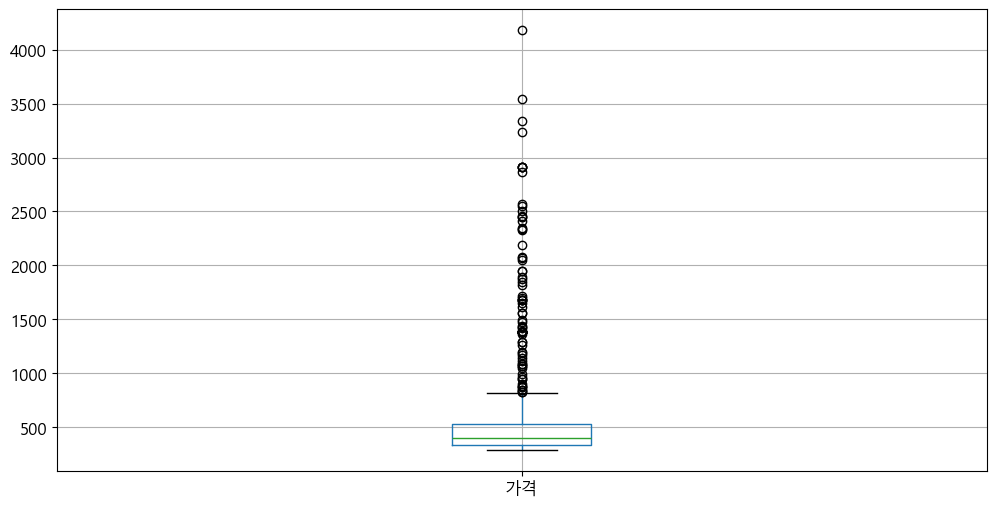

In [12]:
outline_price.boxplot(['가격'])

### [3] 정리

가격 이상치 확인 결과, 이상치에 포함된 상품들은 소위말하는 명품들로 구성되어있었다.

따라서, 데이터의 정확성을 올리기 위해 예외처리를 하였다.

## #05. 조회수 이상치 정제

### [1] 이상치 확인

가격을 정제한 데이터를 가지고와서 확인작업을 한다.

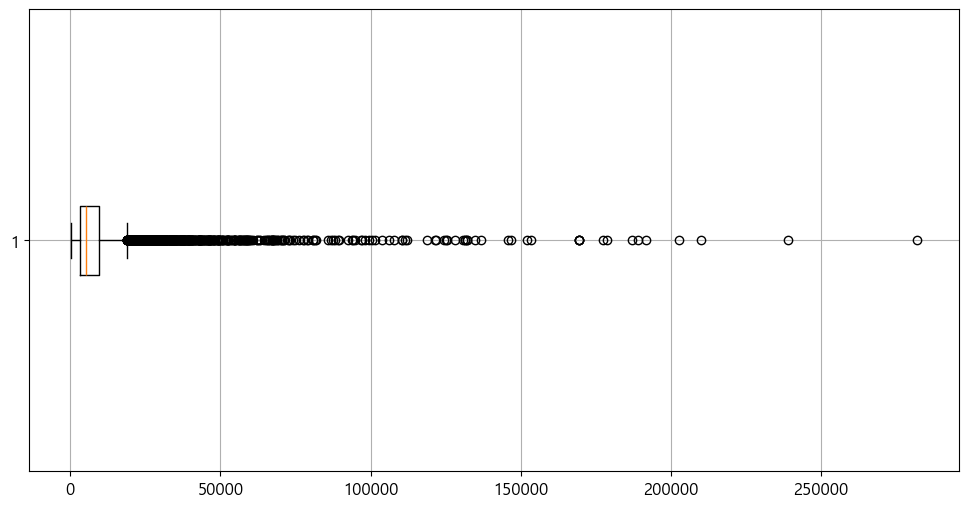

In [13]:
plt.figure()
plt.boxplot(general_price['조회수'],vert=0)
plt.grid()
plt.show()
plt.close()

### [2] 이상치 정제

In [14]:
outline_view = general_price.copy()

Q1 = general_price['조회수'].quantile(0.25)
Q2 = general_price['조회수'].quantile(0.5)
Q3 = general_price['조회수'].quantile(0.75)

# Q1,Q2,Q3

iqr = Q3 - Q1 # 사분위 범위
# print(iqr)

outline_max = Q3 + iqr * 1.5 # 상한 극단치 경계
outline_view.loc[outline_view['조회수'] > outline_max, '조회수'] = np.nan
outline_view

,Unnamed: 0,상품번호,종류,분류,성별,가격,조회수(18세이하),조회수(19~23세),조회수(24~28세),조회수(29~33세),...,조회수,구매수(18세이하),구매수(19~23세),구매수(24~28세),구매수(29~33세),구매수(34~39세),구매수(40세이상),남성 구매수,여성 구매수,구매수
0,0,2037173,14.0,62.0,1.0,62.91,0.184494,0.269298,0.188390,0.119300,...,NaN,0.127981,0.273993,0.207627,0.117263,0.079408,0.194005,0.667375,0.332625,75761
1,1,1163169,9.0,108.0,0.0,139.00,0.098197,0.218562,0.237389,0.153237,...,NaN,0.014608,0.126849,0.258381,0.245146,0.161184,0.194394,0.332730,0.667270,16019
2,2,1178135,9.0,108.0,0.0,139.00,0.058832,0.236185,0.270422,0.163829,...,NaN,0.006985,0.127461,0.291511,0.246740,0.147685,0.179816,0.267429,0.732571,15032
3,3,452483,14.0,31.0,0.0,169.00,0.156108,0.366356,0.210706,0.110642,...,NaN,0.043304,0.363794,0.274365,0.155307,0.063924,0.099414,0.792381,0.207619,9214
4,4,2782764,14.0,4.0,1.0,263.20,0.026988,0.234663,0.339935,0.232592,...,NaN,0.004380,0.185232,0.385690,0.288068,0.081560,0.055277,0.878807,0.121193,4794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7678,7678,2697817,6.0,26.0,0.0,69.90,0.022466,0.093699,0.132603,0.150685,...,1825.0,0.003650,0.113139,0.135036,0.204380,0.218978,0.324818,0.375912,0.624088,274
7679,7679,2757362,6.0,122.0,0.0,38.00,0.202914,0.221198,0.228780,0.163817,...,6727.0,0.126394,0.204461,0.245353,0.219331,0.074349,0.130112,0.754647,0.245353,269
7680,7680,3220337,3.0,102.0,0.0,55.00,0.175500,0.249127,0.183751,0.143447,...,3151.0,0.053638,0.242827,0.327235,0.202079,0.064033,0.110603,0.595842,0.404158,2405
7681,7681,3436582,3.0,93.0,1.0,66.75,0.016043,0.039725,0.145913,0.319328,...,1309.0,0.009615,0.009615,0.048077,0.317308,0.365385,0.250000,0.951923,0.048077,104


In [15]:
outline_view = outline_view.dropna()
outline_view

,Unnamed: 0,상품번호,종류,분류,성별,가격,조회수(18세이하),조회수(19~23세),조회수(24~28세),조회수(29~33세),...,조회수,구매수(18세이하),구매수(19~23세),구매수(24~28세),구매수(29~33세),구매수(34~39세),구매수(40세이상),남성 구매수,여성 구매수,구매수
117,117,2685576,14.0,62.0,0.0,249.00,0.034896,0.103114,0.207197,0.206228,...,16506.0,0.014427,0.075744,0.240757,0.204689,0.146078,0.318305,0.472498,0.527502,1109
127,127,451851,13.0,47.0,1.0,268.00,0.055769,0.261692,0.289070,0.205018,...,18774.0,0.018192,0.183059,0.325753,0.255259,0.135304,0.082433,0.905060,0.094940,1759
144,144,3276429,13.0,5.0,1.0,259.00,0.010966,0.178638,0.345433,0.268067,...,18238.0,0.001676,0.075021,0.347443,0.377619,0.131182,0.067058,0.968986,0.031014,2386
150,150,595038,13.0,5.0,0.0,146.00,0.045262,0.253340,0.258896,0.187040,...,16018.0,0.006934,0.179792,0.299158,0.234274,0.149579,0.130263,0.641407,0.358593,2019
161,161,2959415,5.0,114.0,0.0,103.50,0.065278,0.266833,0.309007,0.157327,...,13634.0,0.018173,0.225307,0.358237,0.213192,0.087330,0.098435,0.291267,0.708733,5943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7677,7677,3666394,3.0,102.0,2.0,89.00,0.148071,0.314392,0.246682,0.126296,...,9644.0,0.100000,0.183333,0.300000,0.216667,0.016667,0.183333,0.066667,0.933333,60
7678,7678,2697817,6.0,26.0,0.0,69.90,0.022466,0.093699,0.132603,0.150685,...,1825.0,0.003650,0.113139,0.135036,0.204380,0.218978,0.324818,0.375912,0.624088,274
7679,7679,2757362,6.0,122.0,0.0,38.00,0.202914,0.221198,0.228780,0.163817,...,6727.0,0.126394,0.204461,0.245353,0.219331,0.074349,0.130112,0.754647,0.245353,269
7680,7680,3220337,3.0,102.0,0.0,55.00,0.175500,0.249127,0.183751,0.143447,...,3151.0,0.053638,0.242827,0.327235,0.202079,0.064033,0.110603,0.595842,0.404158,2405


### [3] 이상치 정제후

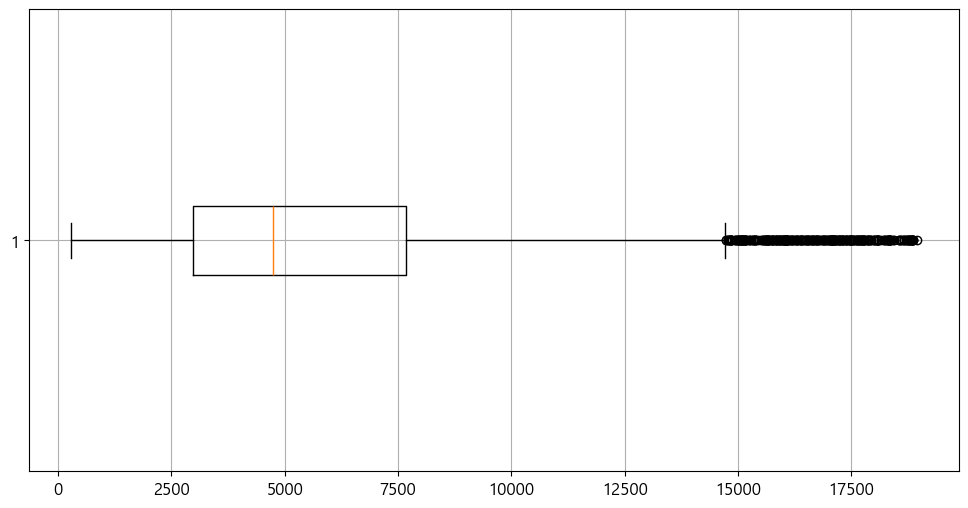

In [16]:
plt.figure()
plt.boxplot(outline_view['조회수'],vert=0)
plt.grid()
plt.show()
plt.close()

### [4] 정리

이상치 확인결과, 조회수가 높은 아이템들은 특수한 이벤트(할인행사,인플루언서 협찬 등)를 통해서 노출도를 올렸다고 판단했다.

## #06. 구매수 이상치 정제

### [1] 이상치 확인

가격과 조회수를 정제한 데이터를 가져온다.

```outline_view```

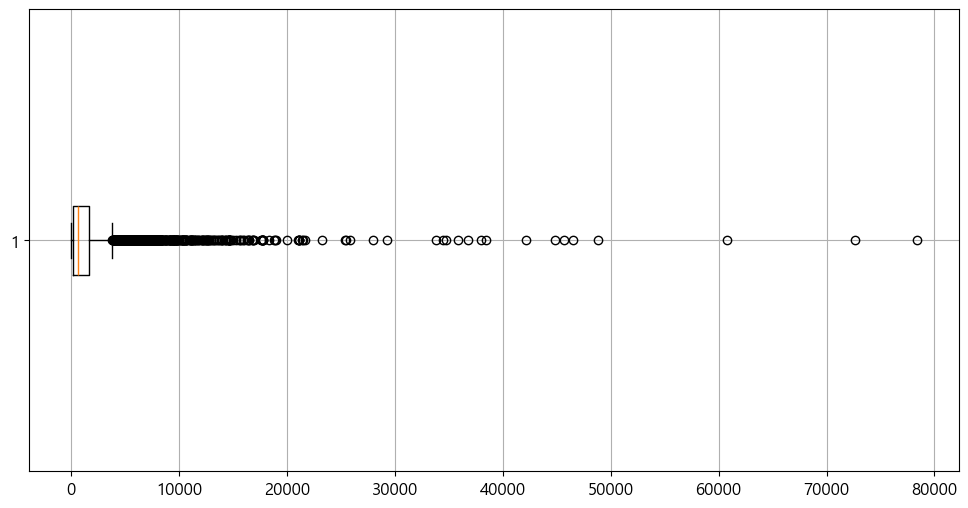

In [17]:
plt.figure()
plt.boxplot(outline_view['구매수'],vert=0)
plt.grid()
plt.show()
plt.close()

### [2] 이상치 정제

In [18]:
outline_buy = outline_view.copy()

Q1 = outline_buy['구매수'].quantile(0.25)
Q2 = outline_buy['구매수'].quantile(0.5)
Q3 = outline_buy['구매수'].quantile(0.75)

# Q1,Q2,Q3

iqr = Q3 - Q1 # 사분위 범위
# print(iqr)

outline_max = Q3 + iqr * 1.5 # 상한 극단치 경계
outline_buy.loc[outline_buy['구매수'] > outline_max, '구매수'] = np.nan
outline_buy

,Unnamed: 0,상품번호,종류,분류,성별,가격,조회수(18세이하),조회수(19~23세),조회수(24~28세),조회수(29~33세),...,조회수,구매수(18세이하),구매수(19~23세),구매수(24~28세),구매수(29~33세),구매수(34~39세),구매수(40세이상),남성 구매수,여성 구매수,구매수
117,117,2685576,14.0,62.0,0.0,249.00,0.034896,0.103114,0.207197,0.206228,...,16506.0,0.014427,0.075744,0.240757,0.204689,0.146078,0.318305,0.472498,0.527502,1109.0
127,127,451851,13.0,47.0,1.0,268.00,0.055769,0.261692,0.289070,0.205018,...,18774.0,0.018192,0.183059,0.325753,0.255259,0.135304,0.082433,0.905060,0.094940,1759.0
144,144,3276429,13.0,5.0,1.0,259.00,0.010966,0.178638,0.345433,0.268067,...,18238.0,0.001676,0.075021,0.347443,0.377619,0.131182,0.067058,0.968986,0.031014,2386.0
150,150,595038,13.0,5.0,0.0,146.00,0.045262,0.253340,0.258896,0.187040,...,16018.0,0.006934,0.179792,0.299158,0.234274,0.149579,0.130263,0.641407,0.358593,2019.0
161,161,2959415,5.0,114.0,0.0,103.50,0.065278,0.266833,0.309007,0.157327,...,13634.0,0.018173,0.225307,0.358237,0.213192,0.087330,0.098435,0.291267,0.708733,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7677,7677,3666394,3.0,102.0,2.0,89.00,0.148071,0.314392,0.246682,0.126296,...,9644.0,0.100000,0.183333,0.300000,0.216667,0.016667,0.183333,0.066667,0.933333,60.0
7678,7678,2697817,6.0,26.0,0.0,69.90,0.022466,0.093699,0.132603,0.150685,...,1825.0,0.003650,0.113139,0.135036,0.204380,0.218978,0.324818,0.375912,0.624088,274.0
7679,7679,2757362,6.0,122.0,0.0,38.00,0.202914,0.221198,0.228780,0.163817,...,6727.0,0.126394,0.204461,0.245353,0.219331,0.074349,0.130112,0.754647,0.245353,269.0
7680,7680,3220337,3.0,102.0,0.0,55.00,0.175500,0.249127,0.183751,0.143447,...,3151.0,0.053638,0.242827,0.327235,0.202079,0.064033,0.110603,0.595842,0.404158,2405.0


In [19]:
outline_buy = outline_buy.dropna()
outline_buy

,Unnamed: 0,상품번호,종류,분류,성별,가격,조회수(18세이하),조회수(19~23세),조회수(24~28세),조회수(29~33세),...,조회수,구매수(18세이하),구매수(19~23세),구매수(24~28세),구매수(29~33세),구매수(34~39세),구매수(40세이상),남성 구매수,여성 구매수,구매수
117,117,2685576,14.0,62.0,0.0,249.00,0.034896,0.103114,0.207197,0.206228,...,16506.0,0.014427,0.075744,0.240757,0.204689,0.146078,0.318305,0.472498,0.527502,1109.0
127,127,451851,13.0,47.0,1.0,268.00,0.055769,0.261692,0.289070,0.205018,...,18774.0,0.018192,0.183059,0.325753,0.255259,0.135304,0.082433,0.905060,0.094940,1759.0
144,144,3276429,13.0,5.0,1.0,259.00,0.010966,0.178638,0.345433,0.268067,...,18238.0,0.001676,0.075021,0.347443,0.377619,0.131182,0.067058,0.968986,0.031014,2386.0
150,150,595038,13.0,5.0,0.0,146.00,0.045262,0.253340,0.258896,0.187040,...,16018.0,0.006934,0.179792,0.299158,0.234274,0.149579,0.130263,0.641407,0.358593,2019.0
171,171,1231944,9.0,108.0,0.0,139.00,0.085543,0.341216,0.265107,0.114992,...,15688.0,0.022356,0.302617,0.338877,0.145038,0.074700,0.116412,0.435115,0.564885,3668.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7677,7677,3666394,3.0,102.0,2.0,89.00,0.148071,0.314392,0.246682,0.126296,...,9644.0,0.100000,0.183333,0.300000,0.216667,0.016667,0.183333,0.066667,0.933333,60.0
7678,7678,2697817,6.0,26.0,0.0,69.90,0.022466,0.093699,0.132603,0.150685,...,1825.0,0.003650,0.113139,0.135036,0.204380,0.218978,0.324818,0.375912,0.624088,274.0
7679,7679,2757362,6.0,122.0,0.0,38.00,0.202914,0.221198,0.228780,0.163817,...,6727.0,0.126394,0.204461,0.245353,0.219331,0.074349,0.130112,0.754647,0.245353,269.0
7680,7680,3220337,3.0,102.0,0.0,55.00,0.175500,0.249127,0.183751,0.143447,...,3151.0,0.053638,0.242827,0.327235,0.202079,0.064033,0.110603,0.595842,0.404158,2405.0


### [3] 이상치 정제후

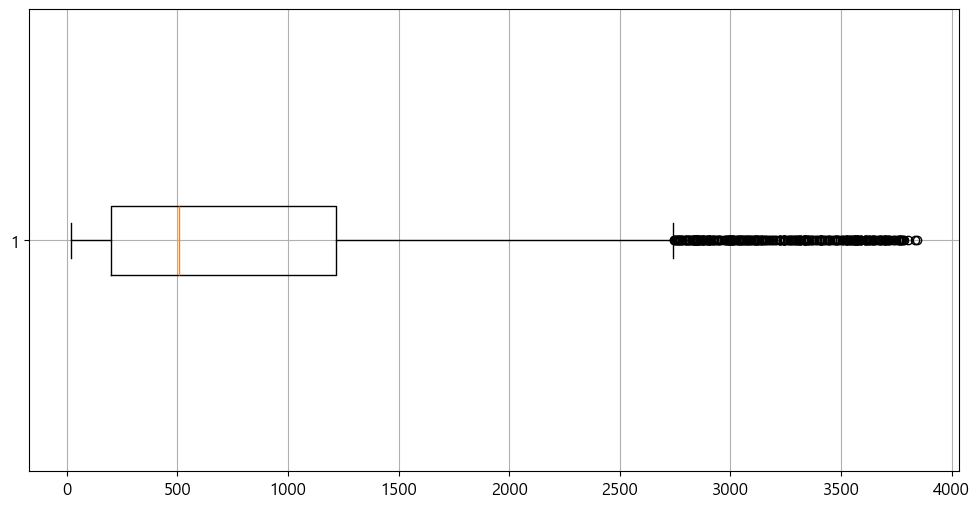

In [20]:
plt.figure()
plt.boxplot(outline_buy['구매수'],vert=0)
plt.grid()
plt.show()
plt.close()

#### [4] 정리

이상치 확인결과, 할인이벤트를 통한 구매가격 인하와 양말과 같은 저렴한 생활 필수품이 차지하고있어서 예외처리를 하였다. 

## #07. 가격, 조회수, 구매수

```outline_buy```는 가격, 조회수, 구매수의 이상치를 다 정제한 데이터이다.

### [1] 가격과 조회수의 산점도와 추세선

#### (1) 추세선 추출

In [21]:
z = np.polyfit(outline_buy['가격'], outline_buy['조회수'], 1)
f = np.poly1d(z)
f

poly1d([  -9.05580837, 6395.56850989])

In [22]:
x = outline_buy['가격']
y = f(x)
y

array([4140.67222676, 3968.61186781, 4050.1141431 , ..., 6051.44779198,
       5897.49904976, 5791.09330146])

#### (2) 산점도 완성

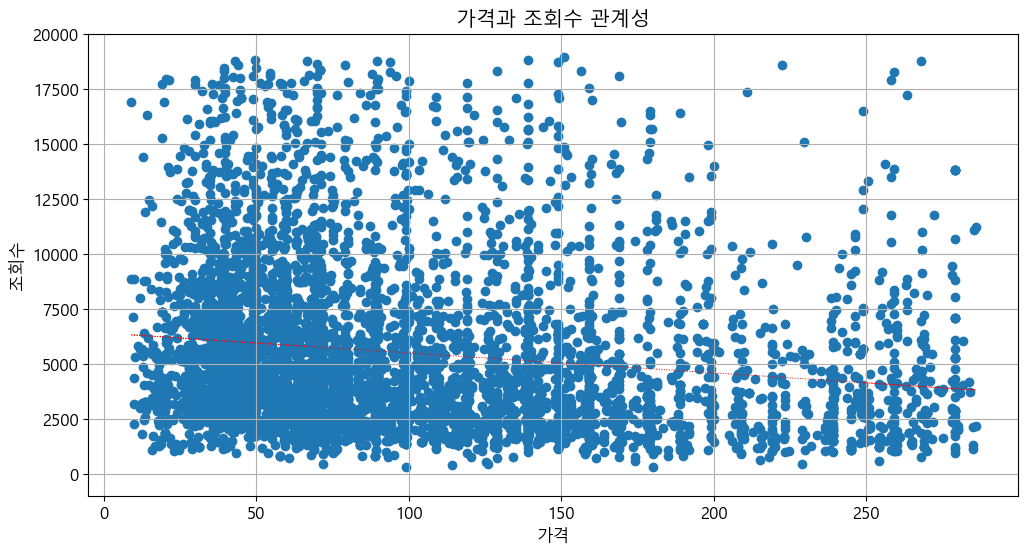

In [23]:
plt.figure()
plt.scatter(outline_buy['가격'], outline_buy['조회수'])
plt.plot(x, y, color="#ff0000", linewidth=0.7, linestyle=":")
plt.title("가격과 조회수 관계성")
plt.xlabel("가격")
plt.ylabel("조회수")
plt.ylim(-1000,20000)
plt.grid()
plt.show()
plt.close()

#### (3) 정리

가격이 25000~75000원, 조회수는 2500~7500회 사이에 많은 상품이 몰려있고, 가격이 올라갈수록 조회수도 낮아진다.

### [2] 가격과 구매수의 산점도와 추세선

#### (1) 추세선 추출

In [24]:
z = np.polyfit(outline_buy['가격'], outline_buy['구매수'], 1)
f = np.poly1d(z)
f

poly1d([  -5.80637117, 1424.01502837])

In [25]:
x = outline_buy['가격']
y = f(x)
y

array([ -21.77139178, -132.09244392,  -79.83510343, ..., 1203.37292409,
       1104.66461428, 1036.43975309])

#### (2) 산점도 완성

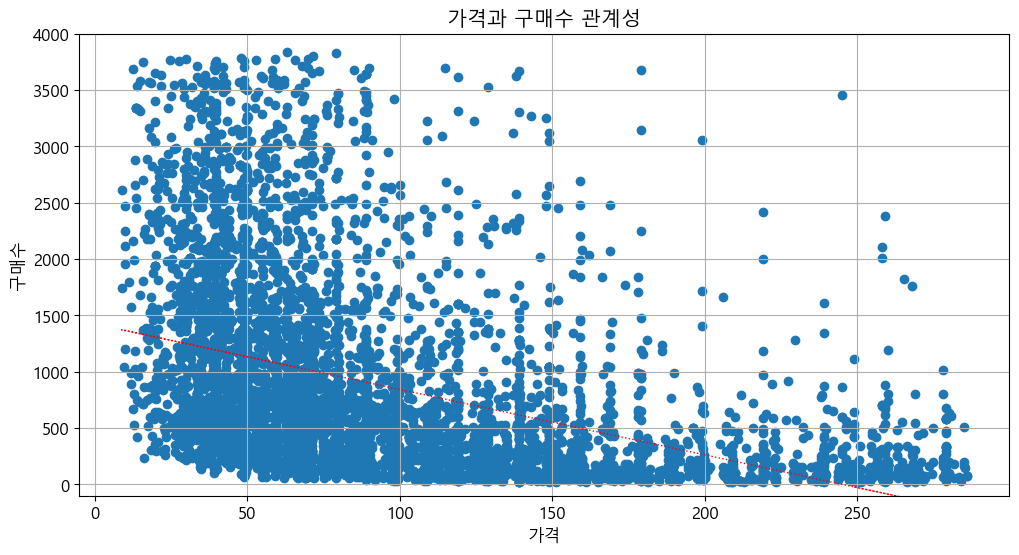

In [26]:
plt.figure()
plt.scatter(outline_buy['가격'], outline_buy['구매수'])
plt.plot(x, y, color="#ff0000", linewidth=1, linestyle=":")
plt.title("가격과 구매수 관계성")
plt.xlabel("가격")
plt.ylabel("구매수")
plt.ylim(-100,4000)
plt.grid()
plt.show()
plt.close()

#### (3) 정리

가격은 25000~100000원, 구매수는 500~1000개에 많이 분포되어있고, 가격이 올라갈수록 구매수는 낮아진다.

### [3] 조회수와구매수의 산점도와 추세선

#### (1) 추세선 추출

In [27]:
z = np.polyfit(outline_buy['조회수'], outline_buy['구매수'], 1)
f = np.poly1d(z)
f

poly1d([7.01160234e-02, 4.62136382e+02])

In [28]:
x = outline_buy['조회수']
y = f(x)
y

array([1619.47146431, 1778.49460534, 1740.91241681, ...,  933.80687165,
        683.07197203,  553.91825696])

#### (2) 산점도 완성

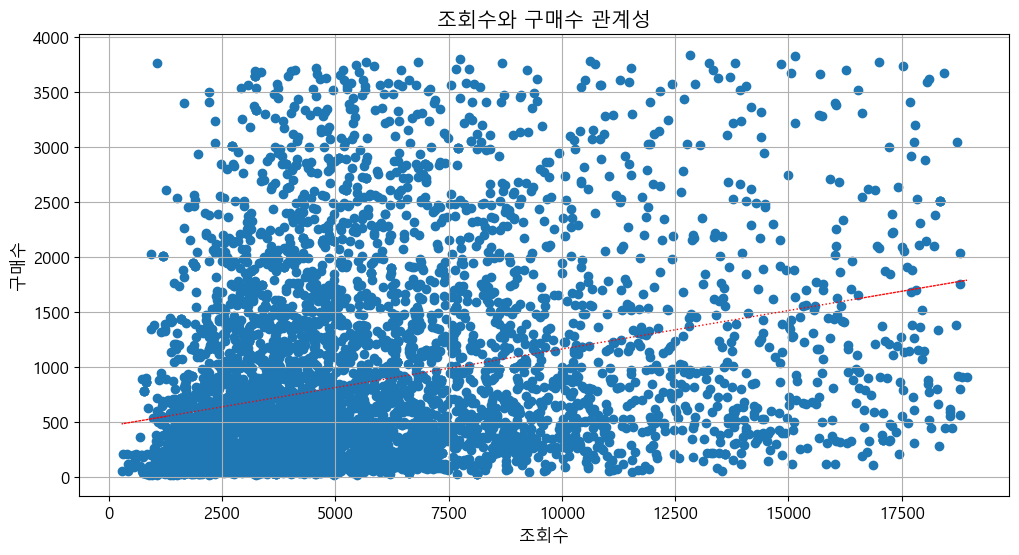

In [29]:
plt.figure()
plt.scatter(outline_buy['조회수'], outline_buy['구매수'])
plt.plot(x, y, color="#ff0000", linewidth=1, linestyle=":")
plt.title("조회수와 구매수 관계성")
plt.xlabel("조회수")
plt.ylabel("구매수")
plt.grid()
plt.show()
plt.close()

#### (3) 정리

조회수는 2000~5000회, 구매수는 0~500회 사이에 많이 밀집되어있고, 조회수가 올라갈수록 구매수가 증가한다.

### [4] 총평

상품의 가격대가 증가할수록 조회수는 감소하고, 구매수도 감소하는 경향을 보인다.  
반면, 특정 조회수 범위에서는 가격에 상관없이 구매수가 증가하는 양상을 확인할 수 있습니다.

In [31]:
outline_buy.to_excel("#5 musinsadata_login_refine.xlsx")